In [1]:
import numpy
import scipy
import matplotlib.pyplot

In [32]:
# proof of principle
distance_matrix1 = numpy.load("/home/data/region_of_interest/distance_mats/hic/michrom_dist_mat_214.npy")

In [15]:
distance_matrix2 = numpy.load("/home/data/region_of_interest/distance_mats/hic/michrom_dist_mat_214.npy")
print(distance_matrix2.shape)
#print(distance_matrix2[0])

(214, 214)


In [47]:
coeff_matrix = numpy.corrcoef(distance_matrix1, distance_matrix2)

In [48]:
coeff_matrix

array([[ 1.        ,  0.98621671,  0.9559708 , ..., -0.69266022,
        -0.69790829, -0.69474853],
       [ 0.98621671,  1.        ,  0.98853343, ..., -0.71396106,
        -0.72120753, -0.71781269],
       [ 0.9559708 ,  0.98853343,  1.        , ..., -0.72645944,
        -0.73526982, -0.73170994],
       ...,
       [-0.69266022, -0.71396106, -0.72645944, ...,  1.        ,
         0.99864418,  0.99953667],
       [-0.69790829, -0.72120753, -0.73526982, ...,  0.99864418,
         1.        ,  0.99938129],
       [-0.69474853, -0.71781269, -0.73170994, ...,  0.99953667,
         0.99938129,  1.        ]])

In [49]:
coeff_matrix[0, 1]

0.9862167141395846

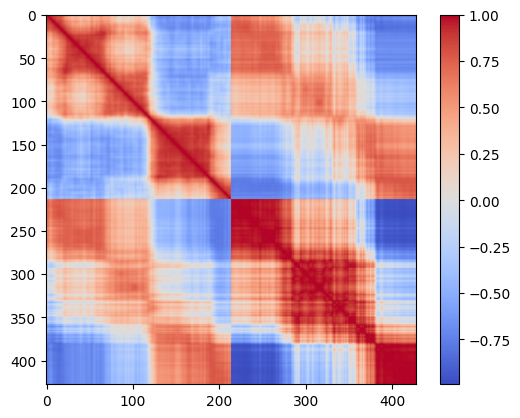

In [55]:
matplotlib.pyplot.imshow(coeff_matrix, cmap='coolwarm')
matplotlib.pyplot.colorbar()

In [51]:
coeff = scipy.signal.correlate2d(in1=distance_matrix1, in2=distance_matrix2)

In [52]:
coeff

array([[0.00000000e+00, 0.00000000e+00, 2.75990673e+00, ...,
        1.41242488e+03, 9.20409733e+02, 4.51569206e+02],
       [0.00000000e+00, 5.51981345e+00, 8.11101912e+00, ...,
        2.74165314e+03, 1.78450769e+03, 8.74572250e+02],
       [2.75990673e+00, 8.11101912e+00, 2.37937239e+01, ...,
        4.13546904e+03, 2.68973311e+03, 1.31751178e+03],
       ...,
       [1.41242488e+03, 2.74165314e+03, 4.13546904e+03, ...,
        4.20607785e+01, 1.37208396e+01, 3.42296844e+00],
       [9.20409733e+02, 1.78450769e+03, 2.68973311e+03, ...,
        1.37208396e+01, 6.84593688e+00, 0.00000000e+00],
       [4.51569206e+02, 8.74572250e+02, 1.31751178e+03, ...,
        3.42296844e+00, 0.00000000e+00, 0.00000000e+00]])

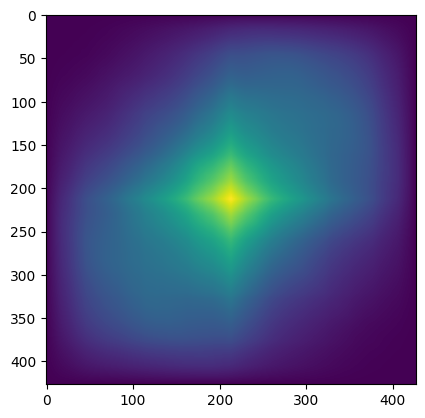

In [53]:
matplotlib.pyplot.imshow(coeff)

In [56]:
corr = numpy.cov(distance_matrix1.flatten(), distance_matrix2.flatten())

In [58]:
corr[0, 0]

0.8637348391624733

In [3]:

software_list = ['dimes', 'loopsage', 'multiem', 'phic', 'michrom']

In [42]:
# HiC
for software1 in software_list:
    for software2 in software_list:
        if software1 == software2:
            continue
        else:
            distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/{software1}_dist_mat_214.npy")
            distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/{software2}_dist_mat_214.npy")
            #print(f"{software1}, {software2}")
            #print(distance_matrix2.shape)
            corr = scipy.stats.spearmanr(distance_matrix1.flatten(), distance_matrix2.flatten())
            corr = numpy.round(corr[0],3)
            print(f"{software1}, {software2}, {corr}")

dimes, loopsage, 0.643
dimes, multiem, 0.725
dimes, phic, 0.593
dimes, michrom, 0.406
loopsage, dimes, 0.643
loopsage, multiem, 0.626
loopsage, phic, 0.61
loopsage, michrom, 0.448
multiem, dimes, 0.725
multiem, loopsage, 0.626
multiem, phic, 0.574
multiem, michrom, 0.382
phic, dimes, 0.593
phic, loopsage, 0.61
phic, multiem, 0.574
phic, michrom, 0.373
michrom, dimes, 0.406
michrom, loopsage, 0.448
michrom, multiem, 0.382
michrom, phic, 0.373


In [49]:
# chiaPET
for software1 in software_list:
    for software2 in software_list:
        if software1 == software2:
            continue
        else:
            distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/chia_pet/{software1}_dist_mat_214.npy")
            distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/chia_pet/{software2}_dist_mat_214.npy")
            corr = scipy.stats.spearmanr(distance_matrix1.flatten(), distance_matrix2.flatten())
            corr = numpy.round(corr[0],3)
            print(f"{software1}, {software2}, {corr}")

dimes, loopsage, 0.341
dimes, multiem, 0.275
dimes, phic, 0.365
dimes, michrom, 0.248
loopsage, dimes, 0.341
loopsage, multiem, 0.8
loopsage, phic, 0.751
loopsage, michrom, 0.418
multiem, dimes, 0.275
multiem, loopsage, 0.8
multiem, phic, 0.776
multiem, michrom, 0.345
phic, dimes, 0.365
phic, loopsage, 0.751
phic, multiem, 0.776
phic, michrom, 0.413
michrom, dimes, 0.248
michrom, loopsage, 0.418
michrom, multiem, 0.345
michrom, phic, 0.413


In [46]:
#HiC based model vs experiment
experimet_list = ['HiC','chiaPET','SPRITE']
epsilon = 1E-30
for software in software_list:
    for experiment in experimet_list:
        distance_matrix1 = numpy.load(f"/home/data/region_of_interest/experimental_data/{experiment}.npy")
        dim = distance_matrix1.shape[0]
        #distance_matrix1 = 1/(distance_matrix1 + epsilon)
        distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/{software}_dist_mat_{dim}.npy")
        distance_matrix2 = 1/(distance_matrix2 + epsilon)
        corr = scipy.stats.spearmanr(distance_matrix1.flatten(), distance_matrix2.flatten())
        corr = numpy.round(corr[0],3)
        print(f"{software}, {experiment}, {corr}")
        
    

dimes, HiC, 0.731
dimes, chiaPET, 0.502
dimes, SPRITE, 0.393
loopsage, HiC, 0.501
loopsage, chiaPET, 0.388
loopsage, SPRITE, 0.308
multiem, HiC, 0.534
multiem, chiaPET, 0.411
multiem, SPRITE, 0.308
phic, HiC, 0.496
phic, chiaPET, 0.415
phic, SPRITE, 0.211
michrom, HiC, 0.34
michrom, chiaPET, 0.293
michrom, SPRITE, 0.185


In [48]:
#chiaPET based model vs experiment
experimet_list = ['HiC','chiaPET','SPRITE']
epsilon = 1E-30
for software in software_list:
    for experiment in experimet_list:
        distance_matrix1 = numpy.load(f"/home/data/region_of_interest/experimental_data/{experiment}.npy")
        dim = distance_matrix1.shape[0]
        #distance_matrix1 = 1/(distance_matrix1 + epsilon)
        distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/chia_pet/{software}_dist_mat_{dim}.npy")
        distance_matrix2 = 1/(distance_matrix2 + epsilon)
        corr = scipy.stats.spearmanr(distance_matrix1.flatten(), distance_matrix2.flatten())
        corr = numpy.round(corr[0],3)
        print(f"{software}, {experiment}, {corr}")
        
    

dimes, HiC, 0.332
dimes, chiaPET, 0.217
dimes, SPRITE, 0.16
loopsage, HiC, 0.576
loopsage, chiaPET, 0.445
loopsage, SPRITE, 0.339
multiem, HiC, 0.554
multiem, chiaPET, 0.437
multiem, SPRITE, 0.33
phic, HiC, 0.608
phic, chiaPET, 0.504
phic, SPRITE, 0.328
michrom, HiC, 0.342
michrom, chiaPET, 0.281
michrom, SPRITE, 0.147


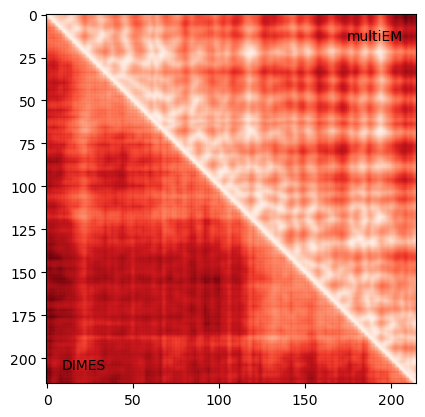

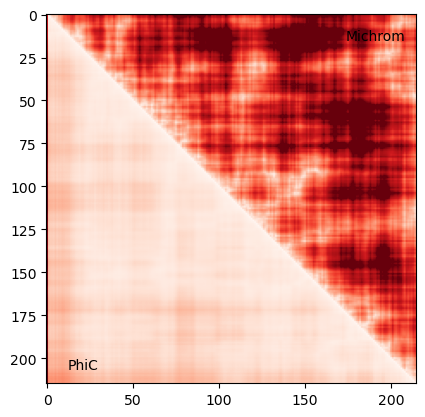

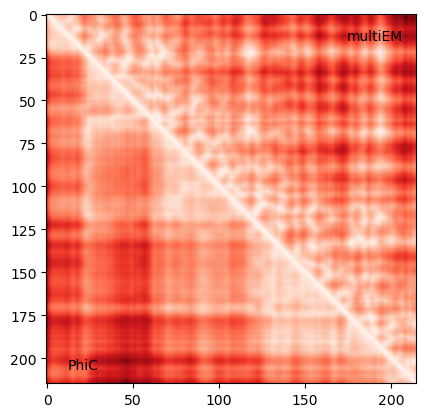

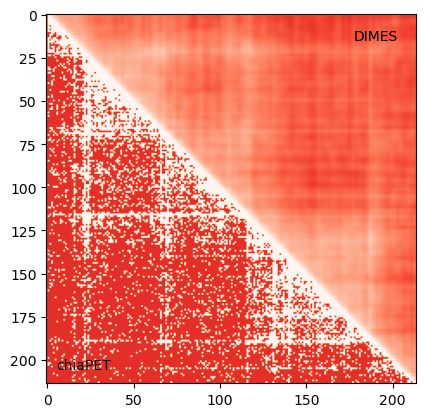

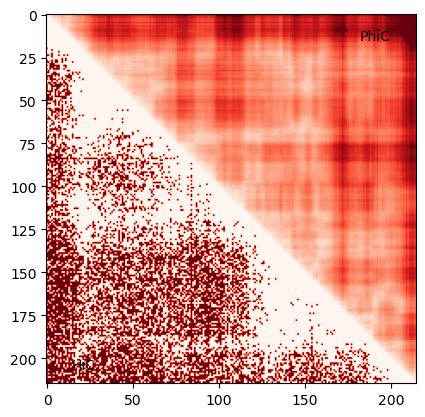

In [127]:
import matplotlib.pyplot as plt

epsilon = 1e-30

# HiC model vs model best
distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/multiem_dist_mat_215.npy")
distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/dimes_dist_mat_215.npy")
fig, ax = plt.subplots()
ax.imshow(numpy.triu(distance_matrix1/distance_matrix1.max())+numpy.tril(distance_matrix2/distance_matrix2.max()), cmap=plt.cm.Reds)
ax.text(0.89,0.94,'multiEM',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.text(0.1,0.05,'DIMES',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.savefig('hic_ModelVsModel_best.png')
plt.show


# HiC model vs model worst
distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/michrom_dist_mat_215.npy")
distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/phic_dist_mat_215.npy")
fig, ax = plt.subplots()
ax.imshow(numpy.triu(distance_matrix1/distance_matrix1.max())+numpy.tril(distance_matrix2/distance_matrix2.max()), vmax=0.7, cmap=plt.cm.Reds)
ax.text(0.89,0.94,'Michrom',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.text(0.1,0.05,'PhiC',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.savefig('hic_ModelVsModel_worst.png')
plt.show()


# chiaPET model vs model best
distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/multiem_dist_mat_215.npy")
distance_matrix2 = numpy.load(f"/home/data/region_of_interest/distance_mats/chia_pet/phic_dist_mat_215.npy")
fig, ax = plt.subplots()
ax.imshow(numpy.triu(distance_matrix1/distance_matrix1.max())+numpy.tril(distance_matrix2/distance_matrix2.max()), cmap=plt.cm.Reds)
ax.text(0.89,0.94,'multiEM',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.text(0.1,0.05,'PhiC',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.savefig('chiaPET_ModelVsModel_best.png')
plt.show()


# HiC model vs experiment
distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/dimes_dist_mat_214.npy")
distance_matrix2 = numpy.load(f"/home/data/region_of_interest/experimental_data/chiaPET.npy")
distance_matrix2 = 1/(distance_matrix2 + epsilon)
fig, ax = plt.subplots()
ax.imshow(numpy.triu(distance_matrix1/distance_matrix1.max())+numpy.tril(distance_matrix2/distance_matrix2.max()), vmax=1.5, cmap=plt.cm.Reds)
ax.text(0.89,0.94,'DIMES',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.text(0.1,0.05,'chiaPET',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.savefig('hic_ModelVsExp_best.png')
plt.show()


# chiaPET model vs experiment
distance_matrix1 = numpy.load(f"/home/data/region_of_interest/distance_mats/hic/phic_dist_mat_215.npy")
distance_matrix2 = numpy.load(f"/home/data/region_of_interest/experimental_data/HiC.npy")
distance_matrix2 = 1/(distance_matrix2 + epsilon)
#thr1 = 0.5
#distance_matrix1[numpy.where(distance_matrix1<thr1)] = thr1
#thr2 = 3
#distance_matrix2[numpy.where(distance_matrix2<thr2)] = thr2 

fig, ax = plt.subplots()
ax.imshow(numpy.triu(distance_matrix1/distance_matrix1.max())*5+numpy.tril(distance_matrix2/distance_matrix2.max()), vmax=1,  cmap=plt.cm.Reds)
ax.text(0.89,0.94,'PhiC',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
ax.text(0.1,0.05,'HiC',horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
plt.savefig('chiaPET_ModelVsExp_best.png')
plt.show()